# Die Einkommensverteilung in der Schweiz

Wie den bei Aymo Brunetti, Volkswirtschaftslehre: Lehrmittel
für die Sekundarstufe II und die Weiterbildung, 15. Auflage, Bern 2023,
Seite 102, dargestellten Daten des Staatssekretariats für Wirtschaft
(seco) entnommen werden kann, wird mehr als die Hälfte des BIP als
Arbeitserwerb verteilt.

Im folgenden soll darüber nachgedacht werden, wie gerecht diese
Erwerbseinkommen verteilt werden.

Gerechtigkeit wird immer wieder mit Gleichheit in Verbindung gebracht.

Eine absolute Gleichheit verursacht allerdings auch Ungerechtigkeiten.

![Chancengleichheit](gerechtigkeit.jpg)
*https://www.walterherzog.ch/cartoons/chancengleichheit/ besucht am 3.12.23*

Das Schweizerische Bundesgericht hat daher einen differenzierten
Gleichheitsbegriff entwickelt:

>Gleiches soll nach Massgabe seiner Gleichheit gleich und ungleiches
>nach Massgabe seiner Ungleichheit ungleich behandelt werden.

## Mass für die Gleichverteilung (des Einkommens)

Als Massstab für die Messung der Gleichverteilung des Einkommens hat
sich der Gini-Koeffizient etabliert. Der Gini-Koeffizient baut auf der
Lorenzkurve auf.

Die Lorenzkurve stellt den prozentualen Anteil der Erwerbstätigen dem
prozentualen Anteil der Einkommen gegenüber.

In [2]:
import matplotlib.pyplot as plt

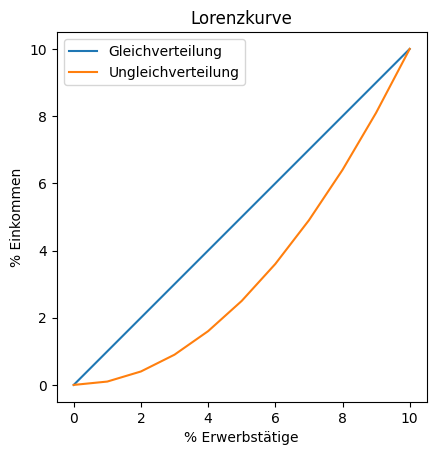

In [15]:
x = [i for i in range(11)]
g = x
u = [0.1 * e ** 2 for e in x]

fig, ax = plt.subplots()
ax.plot(x,g, label="Gleichverteilung")
ax.plot(x,u, label="Ungleichverteilung")
plt.title("Lorenzkurve")
plt.ylabel("% Einkommen")
plt.xlabel("% Erwerbstätige")
plt.legend()
ax.set_aspect('equal')
plt.show()